# Non-linear SVM Classification

Although linear SVM classifiers are efficient and work surprisingly well in many cases, many datasets are not even close to being linearly separable. One way to solve this problem is to add non-linear transformations of the features and then to use a linear SVM on transformed features.

## Review: Polynomial regression

Suppose that we need to build a model to describe the following data set:

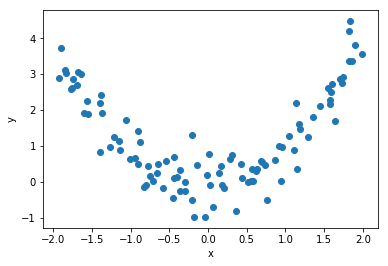

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Generate and plot a non-linear data set
m = 100  # number of data examples
data = pd.DataFrame(index=np.arange(m))
data['x'] = np.random.rand(m) * 4 - 2
data['y'] = data['x'] ** 2 + np.random.randn(m) * 0.5
plt.scatter(data['x'], data['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The distribution is not linear, so we cannot apply linear regression to the data. Now add a new feature 'x^2', whose value is the square of x.

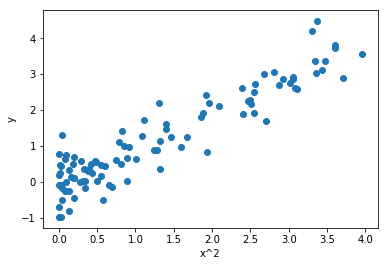

In [2]:
# add x^2 feature to the data set
data['x^2'] = data['x'] ** 2
# plot x^2 against y
plt.scatter(data['x^2'], data['y'])
plt.xlabel('x^2')
plt.ylabel('y')
plt.show()

C:\Users\Amanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
C:\Users\Amanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


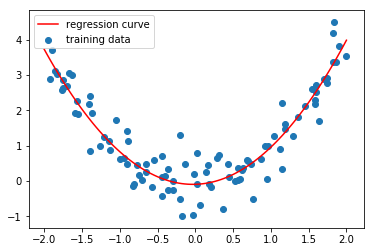

In [3]:
# Use LinearRegression to perform polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(data['x'].reshape(-1, 1))
model = LinearRegression()
model.fit(x_poly, data['y'].reshape(-1, 1))
# draw regression curve together with training data
xs = np.linspace(-2, 2, 100).reshape(-1, 1)
ys = model.predict(poly.transform(xs))
plt.plot(xs, ys, 'r', label='regression curve')
plt.scatter(data['x'], data['y'],
            label='training data')
plt.legend()
plt.show()

## Review: Linear SVM

![title](Data/SVM2.jpeg)

### Assumptions
- Each data example has $n$ features: $\textbf{x} = (x_1, x_2, ..., x_n)$.
- Binary classification: target value $y = 1$ means that the instance belongs to "class 1", $y = -1$ means that the instance belongs to "class -1".
- Classes are **mostly** linearly separable: **with a few exceptions**, the two classes can be separrated with a straight line.
- The goal is to find a **hyperplane** that best separates the two classes. **Mis-classifications are allowed, but each mis-classification will add a cost to the model.**
- The objective function takes into account both **the magnitude of w's (how wide the gap is) and the degree of margin violations**.

### Model
With parameters $\textbf{w} = (w_1, w_2, ..., w_n)$  and $b$:
- $\textbf{w}\cdot \textbf{x}^T + b = 0$ represents the line in the middle of the gap.
- $\textbf{w}\cdot \textbf{x}^T + b = 1$ represents the one boundary of the gap.
- $\textbf{w}\cdot \textbf{x}^T + b = -1$ represents the another boundary of the gap.

### Objective function

$J(\textbf{w}, b)$ 
$= \frac{1}{2}(\textbf{w}\cdot \textbf{w}^T) + C
\sum_{i=1}^m\max(0, 1-y^{(i)}(\textbf{w}\cdot (\textbf{x}^{(i)})^T+b))$

- The first sum in the cost function will push the model to have small weights, leading to a larger margin.
- The second sum computes the total of all margin violations. An instance's margin violation is equal to 0 if it is located off the street and on the correct side, or else it is proportional to the distance to the correct side of the street.
- Minimizing this term ensures that the model makes the margin violations as small and as few as possible.

## Task 1: Non-linear SVM with polynomial features
Consider the following data set:

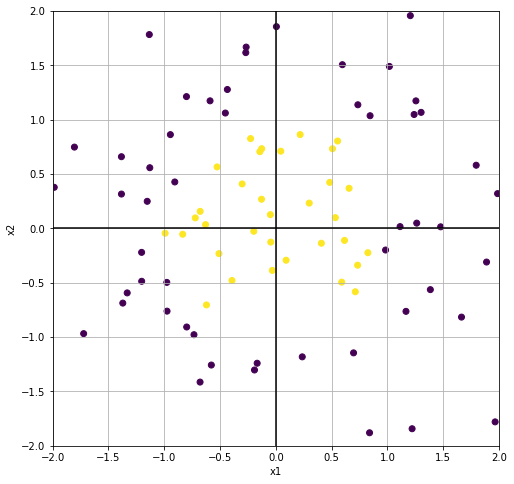

In [4]:
m = 100  # size of data set
data = pd.DataFrame(index=np.arange(m))
# input features: x1, x2
data['x1'] = np.random.randn(m)
data['x2'] = np.random.randn(m)
# target value: y
# y = 0 if (x1, x2) is inside the unit circle
# y = 1 if (x1, x2) is outside of the unit circle
data['y'] = (data['x1'] ** 2 + data['x2'] ** 2 < 1)

# plot the data
plt.figure(figsize=(8, 8))
plt.scatter(data['x1'],
            data['x2'],
            c=data['y'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

This dataset is clearly not linear separable. Next, add two new features 'x1^2' and 'x2^2'.

In [5]:
# add two new features: x1 squared and x2 squared
data['x1^2'] = data['x1'] ** 2
data['x2^2'] = data['x2'] ** 2
data.head()

,x1,x2,y,x1^2,x2^2
0,0.656738,0.368717,True,0.431305,0.135952
1,0.733483,-0.338781,True,0.537997,0.114773
2,1.262920,0.048024,False,1.594968,0.002306
3,0.092562,-0.293034,True,0.008568,0.085869
4,0.615835,-0.110633,True,0.379253,0.012240


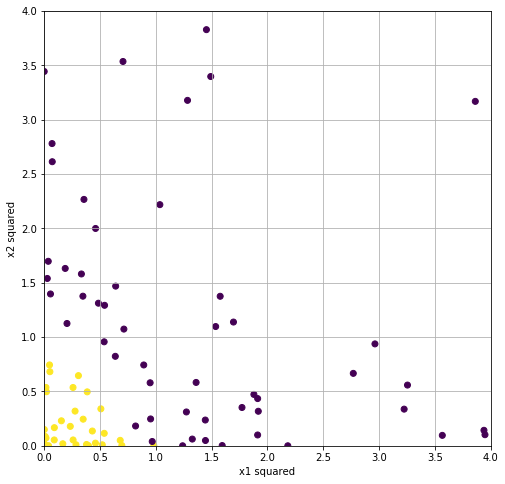

In [6]:
# plot the data with two new features
plt.figure(figsize=(8, 8))
plt.scatter(data['x1^2'],
            data['x2^2'],
            c=data['y'])
plt.grid(True, which='both')
plt.xlabel('x1 squared')
plt.ylabel('x2 squared')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.show()

Under new features, the data set becomes linear separable! This means that we can apply SVM to descibe the distribution. The transformation used to generate new features is called **kernel**. Here we use **polynomial kernel** of degree 2.

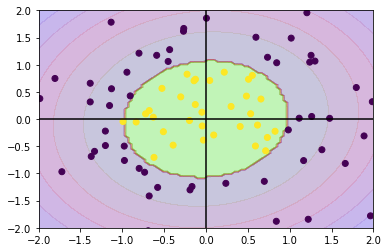

In [7]:
from sklearn.svm import SVC
model = SVC(C=10,
            kernel='poly',
            degree=2,
            coef0=0)
# The hyperparameter coef0 controls how much the
# model is influenced by high-degree polynomials
# versus low-degree polynomials
model.fit(data[['x1', 'x2']], data['y'])

# plot the decision boundary
x1s = np.linspace(-2, 2, 100)
x2s = np.linspace(-2, 2, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X = np.c_[x1.reshape(-1, 1), x2.reshape(-1, 1)]
y_pred = model.predict(X).reshape(x1.shape)
y_decision = model.decision_function(X).reshape(x1.shape)
plt.contourf(x1, x2, y_pred,
             cmap=plt.cm.brg,
             alpha=0.2)
plt.contourf(x1, x2, y_decision,
             cmap=plt.cm.brg,
             alpha=0.1)
plt.scatter(data['x1'], data['x2'], c=data['y'])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

## Task 2: SVM with Gaussian kernel
The drawback of polynomial kernel is that it is not clear how to set the degree and coef0 properly, especially when the number of feature is large and visualization is difficult.

Another technique to tackle nonlinear problems is to add features computed using a *similarity function* that measures how much each instance resembles a particular *landmark*. For example, consider the following 1D dataset:

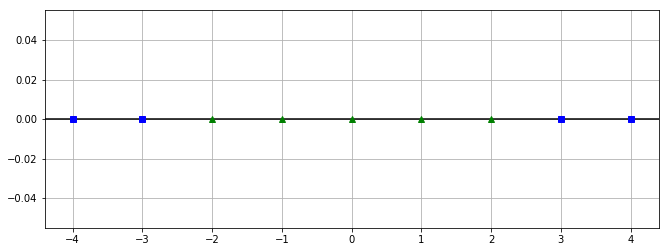

In [8]:
X = np.linspace(-4, 4, 9).reshape(-1, 1)
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0]).reshape(-1, 1)

plt.figure(figsize=(11, 4))
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X[y==0], np.zeros(4), 'bs')
plt.plot(X[y==1], np.zeros(5), 'g^')
plt.show()


Add two landmarks l=-2 and l=1. For each landmark, define the *similarity function*:

$\phi(x, l) = \exp(-\gamma (x - l)^2)$.

Here $\gamma$ is a hyperparameter. This function is called the **Gaussian Radial Basis Function (RBF)**. With $\gamma=0.3$, its graph is:

In [9]:
# the similarity of x = -4 and L = -2 (gamma = 0.3)
import numpy as np
print(np.exp(-0.3 *(-4 - (-2))**2))

# the similarity of x = -1 and L = -2 (gamma = 0.3)
print(np.exp(-0.3 *(-1 - (-2))**2))

0.301194211912
0.740818220682


In [10]:
def GaussianRBF(x,l,gamma=0.3):
    return np.exp(-gamma *(x-l)**2)
print(GaussianRBF(-4,-2))
print(GaussianRBF(-1,-2))

0.301194211912
0.740818220682


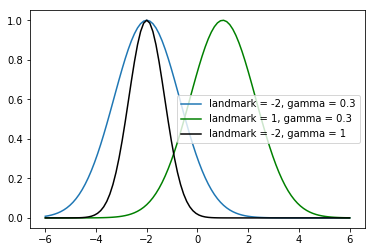

In [11]:
# Let gamma=0.3, plot the Gaussian RBF function.
# generate random x values
x = np.linspace(-6,6,100)
# use for loop to go through all values in x, calculate its corresponding y value, append to y
y0 = []
for i in range(100):
    y0.append(GaussianRBF(x[i],-2))

y1 =GaussianRBF(x,1)
plt.plot(x,y0,label = 'landmark = -2, gamma = 0.3')
plt.plot(x,y1,'g',label = 'landmark = 1, gamma = 0.3')

# plot the curve with L=-2 and gamma = 1
y2 =GaussianRBF(x,-2,gamma=1)
plt.plot(x,y2,'k',label = 'landmark = -2, gamma = 1') # height of peak is the same, however, the peak is more narrow when gamma
                                                      # is increased

plt.legend()
plt.show()

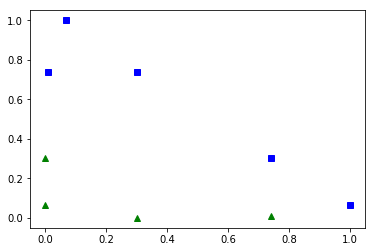

In [12]:
# For landmarks l1=-2 and l2=1, evaluate its 
# similarity function at each data example.

similarity1 = GaussianRBF(X,-2)
similarity2 = GaussianRBF(X,1)


# Visualize the similarities as a 2D scatter plot.
# Notice that data points become linear separable
# in this plot
plt.plot(similarity1[y==0],similarity2[y==0],'g^')
plt.plot(similarity1[y==1],similarity2[y==1],'bs')


plt.show()

In [13]:
X1 = np.linspace(-4, 4, 9).reshape(-1, 1)
y3 = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0]).reshape(-1, 1)

# Use Gaussian RBF as kernel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf',
                gamma=1,
                C=1))
])
model.fit(X1, y3)

C:\Users\Amanda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

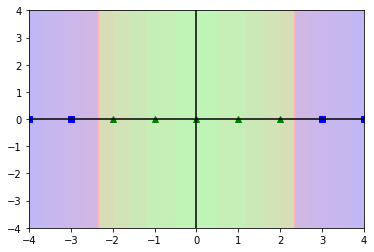

In [14]:
X0 = np.linspace(-4, 4, 9).reshape(-1, 1)
y0 = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

# plot the decision boundary
x1s = np.linspace(-4, 4, 100)
x2s = np.linspace(-4, 4, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X = x1.reshape(-1, 1)
y_pred = model.predict(X).reshape(x1.shape)
y_decision = model.decision_function(X).reshape(x1.shape)
plt.contourf(x1, x2, y_pred,
             cmap=plt.cm.brg,
             alpha=0.2)
plt.contourf(x1, x2, y_decision,
             cmap=plt.cm.brg,
             alpha=0.1)
plt.plot(X0[y0==0], np.zeros(4), 'bs')
plt.plot(X0[y0==1], np.zeros(5), 'g^')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

### Choice of kernels
Consider a dataset with $m$ examples, each having $n$ features.
1. If $m < n$, then it is advised to use no kernel (sometimes called *linear kernel*) to avoid overfitting.
2. If $m$ is slightly larger than $n$, use a kernel (Gaussian RBF kernel is generally better than polynomial kernel in practice)
3. If $m$ is extremely large, it is usually a good idea to create new features.

Other choices of kernels: 
- sigmoid kernel (equivalent to logistic regression)
- string kernel (for text data)
- define new kernels

### Multiclass SVMs
- one-versus-all (OVA) classifiers
- multiclass formulation

## The kernel trick
Adding extra features may dramatically increase the computational complexity. For example, consider a polynomial kernel with degree 3 and set coef0 = 1. This means to transform each input feature x as:

$(x+1)^3 = x^3 + 3x^2 + 3x + 1$,

and two new features 'x^3', 'x^2' are added to the model. If the dataset is very complex and a large degree is needed, the model will create a huge number of features, making the model too slow.

Fortunately, when using SVMs you can apply an almost miraculous mathematical technique called the *kernel trick*, which makes it possible to handle extra features without actually having to add them. As a result, the exponential explosion of complexity is avoided since new features are not actually added.

The math of the kernel trick is beyond the scope of this course, but it is important to know that the kernel trick is what makes adding kernels computationally inexpensive for SVMs (but not so for most other models).

## Homework 
Consider the following *moons* dataset:

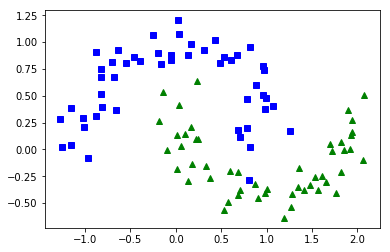

In [15]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100,
                  noise=0.15)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')
plt.show()

1. Build a classifier with Polynomial kernel. Visualize the decision boundary.
2. Build a classifier with Gaussian RBF kernel. Visualize the decision boundary.
3. (optional) Read Section: Under the hood (page 156 - 163), and understand the kernel trick.

ValueError: x and y must be the same size

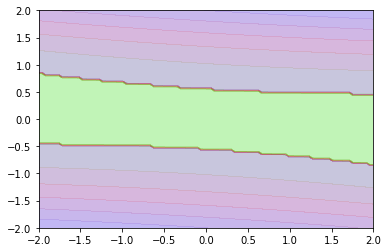

In [16]:
# polynomial kernel

from sklearn.svm import SVC
model = SVC(C=10,
            kernel='poly',
            degree=2,
            coef0=0)
# The hyperparameter coef0 controls how much the
# model is influenced by high-degree polynomials
# versus low-degree polynomials
model.fit(X,y)

# plot the decision boundary
x1s = np.linspace(-2, 2, 100)
x2s = np.linspace(-2, 2, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X1 = np.c_[x1.reshape(-1, 1), x2.reshape(-1, 1)]
y_pred = model.predict(X1).reshape(x1.shape)
y_decision = model.decision_function(X1).reshape(x1.shape)
plt.contourf(x1, x2, y_pred,
             cmap=plt.cm.brg,
             alpha=0.2)
plt.contourf(x1, x2, y_decision,
             cmap=plt.cm.brg,
             alpha=0.1)
plt.scatter(X,y, c=y)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

In [17]:
# Gaussian RBF kernel
# Use Gaussian RBF as kernel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf',
                gamma=1,
                C=1))
])
model.fit(X, y)

X0 = np.linspace(-4, 4, 9).reshape(-1, 1)
y0 = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

# plot the decision boundary
x1s = np.linspace(-4, 4, 100)
x2s = np.linspace(-4, 4, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X = x1.reshape(-1, 1)
y_pred = model.predict(X).reshape(x1.shape)
y_decision = model.decision_function(X).reshape(x1.shape)
plt.contourf(x1, x2, y_pred,
             cmap=plt.cm.brg,
             alpha=0.2)
plt.contourf(x1, x2, y_decision,
             cmap=plt.cm.brg,
             alpha=0.1)
plt.plot(X0[y0==0], np.zeros(4), 'bs')
plt.plot(X0[y0==1], np.zeros(5), 'g^')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

ValueError: non-broadcastable output operand with shape (10000,1) doesn't match the broadcast shape (10000,2)